# Image Segmentation using ResNet-34 and Kaggle Carvana Data

Let's start by doing it the really simple way. And we are going to use Kaggle [Carvana](https://www.kaggle.com/c/carvana-image-masking-challenge) competition and you can download it with Kaggle API as usual.

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from my_scripts.ntfy.notification_callback import *

notif_cb = NotificationCallback()

Import libraries

In [3]:
from fastai.conv_learner import *
from fastai.dataset import *

from pathlib import Path
import json

# torch.cuda.set_device(0)

# Important to enabled the next line.
# For image size 128 training, an epoch took 1 min 33 s instead of 2 min 11 s without this enabled.
torch.backends.cudnn.benchmark = True

## Data

### Download dataset

First, install [official Kaggle API](https://github.com/Kaggle/kaggle-api).

In [ ]:
!pip install kaggle

In [5]:
!kaggle --help

Unauthorized: you must download an API key from https://www.kaggle.com/<username>/account
Then put kaggle.json in the folder /home/ubuntu/.kaggle


In [7]:
!kaggle competitions files -c carvana-image-masking-challenge

name                        size  creationDate         
-------------------------  -----  -------------------  
metadata.csv.zip            81KB  2017-07-24 18:06:08  
train_masks.zip             29MB  2017-07-24 18:06:11  
train_masks.csv.zip         15MB  2017-07-24 18:06:11  
sample_submission.csv.zip  202KB  2017-07-24 18:06:12  
train.zip                  405MB  2017-07-24 18:06:52  
test.zip                     8GB  2017-07-24 18:21:12  
29bb3ece3180_11.jpg        107KB  2017-08-02 23:32:23  
train_hq.zip               804MB  2017-08-30 20:12:44  
test_hq.zip                 15GB  2017-08-30 22:12:12  


In [10]:
%mkdir data/carvana

In [12]:
!kaggle competitions download -c carvana-image-masking-challenge -f metadata.csv.zip -p data/carvana

  0%|                                               | 0.00/81.2k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 81.2k/81.2k [00:00<00:00, 1.11MB/s]


In [14]:
!kaggle competitions download -c carvana-image-masking-challenge -f train_masks.zip -p data/carvana
!kaggle competitions download -c carvana-image-masking-challenge -f train_masks.csv.zip -p data/carvana
!kaggle competitions download -c carvana-image-masking-challenge -f sample_submission.csv -p data/carvana
!kaggle competitions download -c carvana-image-masking-challenge -f train.zip -p data/carvana

 86%|████████████████████████████████▌     | 25.0M/29.1M [00:01<00:00, 18.3MB/s]
100%|██████████████████████████████████████| 29.1M/29.1M [00:01<00:00, 25.7MB/s]
 80%|██████████████████████████████▎       | 15.0M/18.8M [00:00<00:00, 11.8MB/s]
100%|██████████████████████████████████████| 18.8M/18.8M [00:00<00:00, 24.0MB/s]
100%|████████████████████████████████████████| 225k/225k [00:00<00:00, 1.89MB/s]

100%|███████████████████████████████████████▊| 403M/405M [00:15<00:00, 26.8MB/s]
100%|████████████████████████████████████████| 405M/405M [00:15<00:00, 27.2MB/s]


In [18]:
!unzip data/carvana/metadata.csv.zip -d data/carvana/
!unzip data/carvana/sample_submission.csv.zip -d data/carvana/
!unzip data/carvana/train_masks.csv.zip -d data/carvana/
!unzip data/carvana/train_masks.zip -d data/carvana/
!unzip data/carvana/train.zip -d data/carvana/

Archive:  data/carvana/metadata.csv.zip
  inflating: data/carvana/metadata.csv  
Archive:  data/carvana/sample_submission.csv.zip
  inflating: data/carvana/sample_submission.csv  
Archive:  data/carvana/train_masks.csv.zip
  inflating: data/carvana/train_masks.csv  
Archive:  data/carvana/train_masks.zip
   creating: data/carvana/train_masks/
  inflating: data/carvana/train_masks/00087a6bd4dc_01_mask.gif  
 extracting: data/carvana/train_masks/00087a6bd4dc_02_mask.gif  
 extracting: data/carvana/train_masks/00087a6bd4dc_03_mask.gif  
 extracting: data/carvana/train_masks/00087a6bd4dc_04_mask.gif  
  inflating: data/carvana/train_masks/00087a6bd4dc_05_mask.gif  
  inflating: data/carvana/train_masks/00087a6bd4dc_06_mask.gif  
  inflating: data/carvana/train_masks/00087a6bd4dc_07_mask.gif  
  inflating: data/carvana/train_masks/00087a6bd4dc_08_mask.gif  
  inflating: data/carvana/train_masks/00087a6bd4dc_09_mask.gif  
  inflating: data/carvana/train_masks/00087a6bd4dc_10_mask.gif  
 extr

 extracting: data/carvana/train_masks/1b25ea8ba94d_15_mask.gif  
 extracting: data/carvana/train_masks/1b25ea8ba94d_16_mask.gif  
 extracting: data/carvana/train_masks/1ba84b81628e_01_mask.gif  
 extracting: data/carvana/train_masks/1ba84b81628e_02_mask.gif  
 extracting: data/carvana/train_masks/1ba84b81628e_03_mask.gif  
 extracting: data/carvana/train_masks/1ba84b81628e_04_mask.gif  
 extracting: data/carvana/train_masks/1ba84b81628e_05_mask.gif  
 extracting: data/carvana/train_masks/1ba84b81628e_06_mask.gif  
 extracting: data/carvana/train_masks/1ba84b81628e_07_mask.gif  
 extracting: data/carvana/train_masks/1ba84b81628e_08_mask.gif  
  inflating: data/carvana/train_masks/1ba84b81628e_09_mask.gif  
 extracting: data/carvana/train_masks/1ba84b81628e_10_mask.gif  
 extracting: data/carvana/train_masks/1ba84b81628e_11_mask.gif  
 extracting: data/carvana/train_masks/1ba84b81628e_12_mask.gif  
 extracting: data/carvana/train_masks/1ba84b81628e_13_mask.gif  
 extracting: data/carvana

 extracting: data/carvana/train_masks/371f057d1242_01_mask.gif  
 extracting: data/carvana/train_masks/371f057d1242_02_mask.gif  
  inflating: data/carvana/train_masks/371f057d1242_03_mask.gif  
 extracting: data/carvana/train_masks/371f057d1242_04_mask.gif  
  inflating: data/carvana/train_masks/371f057d1242_05_mask.gif  
 extracting: data/carvana/train_masks/371f057d1242_06_mask.gif  
  inflating: data/carvana/train_masks/371f057d1242_07_mask.gif  
 extracting: data/carvana/train_masks/371f057d1242_08_mask.gif  
 extracting: data/carvana/train_masks/371f057d1242_09_mask.gif  
 extracting: data/carvana/train_masks/371f057d1242_10_mask.gif  
 extracting: data/carvana/train_masks/371f057d1242_11_mask.gif  
 extracting: data/carvana/train_masks/371f057d1242_12_mask.gif  
 extracting: data/carvana/train_masks/371f057d1242_13_mask.gif  
 extracting: data/carvana/train_masks/371f057d1242_14_mask.gif  
  inflating: data/carvana/train_masks/371f057d1242_15_mask.gif  
 extracting: data/carvana

 extracting: data/carvana/train_masks/4e7bc95552ed_01_mask.gif  
 extracting: data/carvana/train_masks/4e7bc95552ed_02_mask.gif  
  inflating: data/carvana/train_masks/4e7bc95552ed_03_mask.gif  
 extracting: data/carvana/train_masks/4e7bc95552ed_04_mask.gif  
  inflating: data/carvana/train_masks/4e7bc95552ed_05_mask.gif  
 extracting: data/carvana/train_masks/4e7bc95552ed_06_mask.gif  
 extracting: data/carvana/train_masks/4e7bc95552ed_07_mask.gif  
 extracting: data/carvana/train_masks/4e7bc95552ed_08_mask.gif  
 extracting: data/carvana/train_masks/4e7bc95552ed_09_mask.gif  
 extracting: data/carvana/train_masks/4e7bc95552ed_10_mask.gif  
 extracting: data/carvana/train_masks/4e7bc95552ed_11_mask.gif  
 extracting: data/carvana/train_masks/4e7bc95552ed_12_mask.gif  
  inflating: data/carvana/train_masks/4e7bc95552ed_13_mask.gif  
 extracting: data/carvana/train_masks/4e7bc95552ed_14_mask.gif  
  inflating: data/carvana/train_masks/4e7bc95552ed_15_mask.gif  
 extracting: data/carvana

  inflating: data/carvana/train_masks/6bf969856536_04_mask.gif  
  inflating: data/carvana/train_masks/6bf969856536_05_mask.gif  
  inflating: data/carvana/train_masks/6bf969856536_06_mask.gif  
 extracting: data/carvana/train_masks/6bf969856536_07_mask.gif  
  inflating: data/carvana/train_masks/6bf969856536_08_mask.gif  
  inflating: data/carvana/train_masks/6bf969856536_09_mask.gif  
  inflating: data/carvana/train_masks/6bf969856536_10_mask.gif  
 extracting: data/carvana/train_masks/6bf969856536_11_mask.gif  
  inflating: data/carvana/train_masks/6bf969856536_12_mask.gif  
  inflating: data/carvana/train_masks/6bf969856536_13_mask.gif  
  inflating: data/carvana/train_masks/6bf969856536_14_mask.gif  
  inflating: data/carvana/train_masks/6bf969856536_15_mask.gif  
 extracting: data/carvana/train_masks/6bf969856536_16_mask.gif  
  inflating: data/carvana/train_masks/6bfd601be25e_01_mask.gif  
 extracting: data/carvana/train_masks/6bfd601be25e_02_mask.gif  
 extracting: data/carvana

 extracting: data/carvana/train_masks/8603668953a6_12_mask.gif  
 extracting: data/carvana/train_masks/8603668953a6_13_mask.gif  
 extracting: data/carvana/train_masks/8603668953a6_14_mask.gif  
 extracting: data/carvana/train_masks/8603668953a6_15_mask.gif  
 extracting: data/carvana/train_masks/8603668953a6_16_mask.gif  
 extracting: data/carvana/train_masks/86c10c8c6206_01_mask.gif  
 extracting: data/carvana/train_masks/86c10c8c6206_02_mask.gif  
 extracting: data/carvana/train_masks/86c10c8c6206_03_mask.gif  
 extracting: data/carvana/train_masks/86c10c8c6206_04_mask.gif  
  inflating: data/carvana/train_masks/86c10c8c6206_05_mask.gif  
  inflating: data/carvana/train_masks/86c10c8c6206_06_mask.gif  
 extracting: data/carvana/train_masks/86c10c8c6206_07_mask.gif  
 extracting: data/carvana/train_masks/86c10c8c6206_08_mask.gif  
  inflating: data/carvana/train_masks/86c10c8c6206_09_mask.gif  
 extracting: data/carvana/train_masks/86c10c8c6206_10_mask.gif  
 extracting: data/carvana

 extracting: data/carvana/train_masks/a56f923399ca_10_mask.gif  
  inflating: data/carvana/train_masks/a56f923399ca_11_mask.gif  
 extracting: data/carvana/train_masks/a56f923399ca_12_mask.gif  
 extracting: data/carvana/train_masks/a56f923399ca_13_mask.gif  
 extracting: data/carvana/train_masks/a56f923399ca_14_mask.gif  
 extracting: data/carvana/train_masks/a56f923399ca_15_mask.gif  
 extracting: data/carvana/train_masks/a56f923399ca_16_mask.gif  
 extracting: data/carvana/train_masks/a5fea424990e_01_mask.gif  
 extracting: data/carvana/train_masks/a5fea424990e_02_mask.gif  
 extracting: data/carvana/train_masks/a5fea424990e_03_mask.gif  
 extracting: data/carvana/train_masks/a5fea424990e_04_mask.gif  
 extracting: data/carvana/train_masks/a5fea424990e_05_mask.gif  
 extracting: data/carvana/train_masks/a5fea424990e_06_mask.gif  
  inflating: data/carvana/train_masks/a5fea424990e_07_mask.gif  
 extracting: data/carvana/train_masks/a5fea424990e_08_mask.gif  
  inflating: data/carvana

  inflating: data/carvana/train_masks/c7145a80089e_07_mask.gif  
 extracting: data/carvana/train_masks/c7145a80089e_08_mask.gif  
 extracting: data/carvana/train_masks/c7145a80089e_09_mask.gif  
 extracting: data/carvana/train_masks/c7145a80089e_10_mask.gif  
 extracting: data/carvana/train_masks/c7145a80089e_11_mask.gif  
  inflating: data/carvana/train_masks/c7145a80089e_12_mask.gif  
 extracting: data/carvana/train_masks/c7145a80089e_13_mask.gif  
 extracting: data/carvana/train_masks/c7145a80089e_14_mask.gif  
  inflating: data/carvana/train_masks/c7145a80089e_15_mask.gif  
 extracting: data/carvana/train_masks/c7145a80089e_16_mask.gif  
 extracting: data/carvana/train_masks/c7a94c46a3b2_01_mask.gif  
 extracting: data/carvana/train_masks/c7a94c46a3b2_02_mask.gif  
 extracting: data/carvana/train_masks/c7a94c46a3b2_03_mask.gif  
 extracting: data/carvana/train_masks/c7a94c46a3b2_04_mask.gif  
 extracting: data/carvana/train_masks/c7a94c46a3b2_05_mask.gif  
 extracting: data/carvana

 extracting: data/carvana/train_masks/e8f607100c1f_02_mask.gif  
 extracting: data/carvana/train_masks/e8f607100c1f_03_mask.gif  
 extracting: data/carvana/train_masks/e8f607100c1f_04_mask.gif  
 extracting: data/carvana/train_masks/e8f607100c1f_05_mask.gif  
  inflating: data/carvana/train_masks/e8f607100c1f_06_mask.gif  
 extracting: data/carvana/train_masks/e8f607100c1f_07_mask.gif  
 extracting: data/carvana/train_masks/e8f607100c1f_08_mask.gif  
  inflating: data/carvana/train_masks/e8f607100c1f_09_mask.gif  
 extracting: data/carvana/train_masks/e8f607100c1f_10_mask.gif  
 extracting: data/carvana/train_masks/e8f607100c1f_11_mask.gif  
 extracting: data/carvana/train_masks/e8f607100c1f_12_mask.gif  
 extracting: data/carvana/train_masks/e8f607100c1f_13_mask.gif  
  inflating: data/carvana/train_masks/e8f607100c1f_14_mask.gif  
 extracting: data/carvana/train_masks/e8f607100c1f_15_mask.gif  
 extracting: data/carvana/train_masks/e8f607100c1f_16_mask.gif  
 extracting: data/carvana

Archive:  data/carvana/train.zip
   creating: data/carvana/train/
  inflating: data/carvana/train/00087a6bd4dc_01.jpg  
  inflating: data/carvana/train/00087a6bd4dc_02.jpg  
  inflating: data/carvana/train/00087a6bd4dc_03.jpg  
  inflating: data/carvana/train/00087a6bd4dc_04.jpg  
  inflating: data/carvana/train/00087a6bd4dc_05.jpg  
  inflating: data/carvana/train/00087a6bd4dc_06.jpg  
  inflating: data/carvana/train/00087a6bd4dc_07.jpg  
  inflating: data/carvana/train/00087a6bd4dc_08.jpg  
  inflating: data/carvana/train/00087a6bd4dc_09.jpg  
  inflating: data/carvana/train/00087a6bd4dc_10.jpg  
  inflating: data/carvana/train/00087a6bd4dc_11.jpg  
  inflating: data/carvana/train/00087a6bd4dc_12.jpg  
  inflating: data/carvana/train/00087a6bd4dc_13.jpg  
  inflating: data/carvana/train/00087a6bd4dc_14.jpg  
  inflating: data/carvana/train/00087a6bd4dc_15.jpg  
  inflating: data/carvana/train/00087a6bd4dc_16.jpg  
  inflating: data/carvana/train/02159e548029_01.jpg  
  inflating: dat

  inflating: data/carvana/train/0d3adbbc9a8b_09.jpg  
  inflating: data/carvana/train/0d3adbbc9a8b_10.jpg  
  inflating: data/carvana/train/0d3adbbc9a8b_11.jpg  
  inflating: data/carvana/train/0d3adbbc9a8b_12.jpg  
  inflating: data/carvana/train/0d3adbbc9a8b_13.jpg  
  inflating: data/carvana/train/0d3adbbc9a8b_14.jpg  
  inflating: data/carvana/train/0d3adbbc9a8b_15.jpg  
  inflating: data/carvana/train/0d3adbbc9a8b_16.jpg  
  inflating: data/carvana/train/0d53224da2b7_01.jpg  
  inflating: data/carvana/train/0d53224da2b7_02.jpg  
  inflating: data/carvana/train/0d53224da2b7_03.jpg  
  inflating: data/carvana/train/0d53224da2b7_04.jpg  
  inflating: data/carvana/train/0d53224da2b7_05.jpg  
  inflating: data/carvana/train/0d53224da2b7_06.jpg  
  inflating: data/carvana/train/0d53224da2b7_07.jpg  
  inflating: data/carvana/train/0d53224da2b7_08.jpg  
  inflating: data/carvana/train/0d53224da2b7_09.jpg  
  inflating: data/carvana/train/0d53224da2b7_10.jpg  
  inflating: data/carvana/tr

  inflating: data/carvana/train/125cadcb9feb_08.jpg  
  inflating: data/carvana/train/125cadcb9feb_09.jpg  
  inflating: data/carvana/train/125cadcb9feb_10.jpg  
  inflating: data/carvana/train/125cadcb9feb_11.jpg  
  inflating: data/carvana/train/125cadcb9feb_12.jpg  
  inflating: data/carvana/train/125cadcb9feb_13.jpg  
  inflating: data/carvana/train/125cadcb9feb_14.jpg  
  inflating: data/carvana/train/125cadcb9feb_15.jpg  
  inflating: data/carvana/train/125cadcb9feb_16.jpg  
  inflating: data/carvana/train/1390696b70b6_01.jpg  
  inflating: data/carvana/train/1390696b70b6_02.jpg  
  inflating: data/carvana/train/1390696b70b6_03.jpg  
  inflating: data/carvana/train/1390696b70b6_04.jpg  
  inflating: data/carvana/train/1390696b70b6_05.jpg  
  inflating: data/carvana/train/1390696b70b6_06.jpg  
  inflating: data/carvana/train/1390696b70b6_07.jpg  
  inflating: data/carvana/train/1390696b70b6_08.jpg  
  inflating: data/carvana/train/1390696b70b6_09.jpg  
  inflating: data/carvana/tr

  inflating: data/carvana/train/1ae8a68a40e4_05.jpg  
  inflating: data/carvana/train/1ae8a68a40e4_06.jpg  
  inflating: data/carvana/train/1ae8a68a40e4_07.jpg  
  inflating: data/carvana/train/1ae8a68a40e4_08.jpg  
  inflating: data/carvana/train/1ae8a68a40e4_09.jpg  
  inflating: data/carvana/train/1ae8a68a40e4_10.jpg  
  inflating: data/carvana/train/1ae8a68a40e4_11.jpg  
  inflating: data/carvana/train/1ae8a68a40e4_12.jpg  
  inflating: data/carvana/train/1ae8a68a40e4_13.jpg  
  inflating: data/carvana/train/1ae8a68a40e4_14.jpg  
  inflating: data/carvana/train/1ae8a68a40e4_15.jpg  
  inflating: data/carvana/train/1ae8a68a40e4_16.jpg  
  inflating: data/carvana/train/1b25ea8ba94d_01.jpg  
  inflating: data/carvana/train/1b25ea8ba94d_02.jpg  
  inflating: data/carvana/train/1b25ea8ba94d_03.jpg  
  inflating: data/carvana/train/1b25ea8ba94d_04.jpg  
  inflating: data/carvana/train/1b25ea8ba94d_05.jpg  
  inflating: data/carvana/train/1b25ea8ba94d_06.jpg  
  inflating: data/carvana/tr

  inflating: data/carvana/train/26ccab021981_11.jpg  
  inflating: data/carvana/train/26ccab021981_12.jpg  
  inflating: data/carvana/train/26ccab021981_13.jpg  
  inflating: data/carvana/train/26ccab021981_14.jpg  
  inflating: data/carvana/train/26ccab021981_15.jpg  
  inflating: data/carvana/train/26ccab021981_16.jpg  
  inflating: data/carvana/train/28109f18d9d4_01.jpg  
  inflating: data/carvana/train/28109f18d9d4_02.jpg  
  inflating: data/carvana/train/28109f18d9d4_03.jpg  
  inflating: data/carvana/train/28109f18d9d4_04.jpg  
  inflating: data/carvana/train/28109f18d9d4_05.jpg  
  inflating: data/carvana/train/28109f18d9d4_06.jpg  
  inflating: data/carvana/train/28109f18d9d4_07.jpg  
  inflating: data/carvana/train/28109f18d9d4_08.jpg  
  inflating: data/carvana/train/28109f18d9d4_09.jpg  
  inflating: data/carvana/train/28109f18d9d4_10.jpg  
  inflating: data/carvana/train/28109f18d9d4_11.jpg  
  inflating: data/carvana/train/28109f18d9d4_12.jpg  
  inflating: data/carvana/tr

  inflating: data/carvana/train/2cb91c2543fa_08.jpg  
  inflating: data/carvana/train/2cb91c2543fa_09.jpg  
  inflating: data/carvana/train/2cb91c2543fa_10.jpg  
  inflating: data/carvana/train/2cb91c2543fa_11.jpg  
  inflating: data/carvana/train/2cb91c2543fa_12.jpg  
  inflating: data/carvana/train/2cb91c2543fa_13.jpg  
  inflating: data/carvana/train/2cb91c2543fa_14.jpg  
  inflating: data/carvana/train/2cb91c2543fa_15.jpg  
  inflating: data/carvana/train/2cb91c2543fa_16.jpg  
  inflating: data/carvana/train/2ea62c1beee7_01.jpg  
  inflating: data/carvana/train/2ea62c1beee7_02.jpg  
  inflating: data/carvana/train/2ea62c1beee7_03.jpg  
  inflating: data/carvana/train/2ea62c1beee7_04.jpg  
  inflating: data/carvana/train/2ea62c1beee7_05.jpg  
  inflating: data/carvana/train/2ea62c1beee7_06.jpg  
  inflating: data/carvana/train/2ea62c1beee7_07.jpg  
  inflating: data/carvana/train/2ea62c1beee7_08.jpg  
  inflating: data/carvana/train/2ea62c1beee7_09.jpg  
  inflating: data/carvana/tr

  inflating: data/carvana/train/344ece157efc_09.jpg  
  inflating: data/carvana/train/344ece157efc_10.jpg  
  inflating: data/carvana/train/344ece157efc_11.jpg  
  inflating: data/carvana/train/344ece157efc_12.jpg  
  inflating: data/carvana/train/344ece157efc_13.jpg  
  inflating: data/carvana/train/344ece157efc_14.jpg  
  inflating: data/carvana/train/344ece157efc_15.jpg  
  inflating: data/carvana/train/344ece157efc_16.jpg  
  inflating: data/carvana/train/34b0c08544a5_01.jpg  
  inflating: data/carvana/train/34b0c08544a5_02.jpg  
  inflating: data/carvana/train/34b0c08544a5_03.jpg  
  inflating: data/carvana/train/34b0c08544a5_04.jpg  
  inflating: data/carvana/train/34b0c08544a5_05.jpg  
  inflating: data/carvana/train/34b0c08544a5_06.jpg  
  inflating: data/carvana/train/34b0c08544a5_07.jpg  
  inflating: data/carvana/train/34b0c08544a5_08.jpg  
  inflating: data/carvana/train/34b0c08544a5_09.jpg  
  inflating: data/carvana/train/34b0c08544a5_10.jpg  
  inflating: data/carvana/tr

  inflating: data/carvana/train/3a7a8f03e713_11.jpg  
  inflating: data/carvana/train/3a7a8f03e713_12.jpg  
  inflating: data/carvana/train/3a7a8f03e713_13.jpg  
  inflating: data/carvana/train/3a7a8f03e713_14.jpg  
  inflating: data/carvana/train/3a7a8f03e713_15.jpg  
  inflating: data/carvana/train/3a7a8f03e713_16.jpg  
  inflating: data/carvana/train/3afec4b5ac07_01.jpg  
  inflating: data/carvana/train/3afec4b5ac07_02.jpg  
  inflating: data/carvana/train/3afec4b5ac07_03.jpg  
  inflating: data/carvana/train/3afec4b5ac07_04.jpg  
  inflating: data/carvana/train/3afec4b5ac07_05.jpg  
  inflating: data/carvana/train/3afec4b5ac07_06.jpg  
  inflating: data/carvana/train/3afec4b5ac07_07.jpg  
  inflating: data/carvana/train/3afec4b5ac07_08.jpg  
  inflating: data/carvana/train/3afec4b5ac07_09.jpg  
  inflating: data/carvana/train/3afec4b5ac07_10.jpg  
  inflating: data/carvana/train/3afec4b5ac07_11.jpg  
  inflating: data/carvana/train/3afec4b5ac07_12.jpg  
  inflating: data/carvana/tr

  inflating: data/carvana/train/40851e617b93_01.jpg  
  inflating: data/carvana/train/40851e617b93_02.jpg  
  inflating: data/carvana/train/40851e617b93_03.jpg  
  inflating: data/carvana/train/40851e617b93_04.jpg  
  inflating: data/carvana/train/40851e617b93_05.jpg  
  inflating: data/carvana/train/40851e617b93_06.jpg  
  inflating: data/carvana/train/40851e617b93_07.jpg  
  inflating: data/carvana/train/40851e617b93_08.jpg  
  inflating: data/carvana/train/40851e617b93_09.jpg  
  inflating: data/carvana/train/40851e617b93_10.jpg  
  inflating: data/carvana/train/40851e617b93_11.jpg  
  inflating: data/carvana/train/40851e617b93_12.jpg  
  inflating: data/carvana/train/40851e617b93_13.jpg  
  inflating: data/carvana/train/40851e617b93_14.jpg  
  inflating: data/carvana/train/40851e617b93_15.jpg  
  inflating: data/carvana/train/40851e617b93_16.jpg  
  inflating: data/carvana/train/419687d50dcd_01.jpg  
  inflating: data/carvana/train/419687d50dcd_02.jpg  
  inflating: data/carvana/tr

  inflating: data/carvana/train/4a4364d7fc6d_05.jpg  
  inflating: data/carvana/train/4a4364d7fc6d_06.jpg  
  inflating: data/carvana/train/4a4364d7fc6d_07.jpg  
  inflating: data/carvana/train/4a4364d7fc6d_08.jpg  
  inflating: data/carvana/train/4a4364d7fc6d_09.jpg  
  inflating: data/carvana/train/4a4364d7fc6d_10.jpg  
  inflating: data/carvana/train/4a4364d7fc6d_11.jpg  
  inflating: data/carvana/train/4a4364d7fc6d_12.jpg  
  inflating: data/carvana/train/4a4364d7fc6d_13.jpg  
  inflating: data/carvana/train/4a4364d7fc6d_14.jpg  
  inflating: data/carvana/train/4a4364d7fc6d_15.jpg  
  inflating: data/carvana/train/4a4364d7fc6d_16.jpg  
  inflating: data/carvana/train/4b74275babf7_01.jpg  
  inflating: data/carvana/train/4b74275babf7_02.jpg  
  inflating: data/carvana/train/4b74275babf7_03.jpg  
  inflating: data/carvana/train/4b74275babf7_04.jpg  
  inflating: data/carvana/train/4b74275babf7_05.jpg  
  inflating: data/carvana/train/4b74275babf7_06.jpg  
  inflating: data/carvana/tr

  inflating: data/carvana/train/4fc2470c0f7b_10.jpg  
  inflating: data/carvana/train/4fc2470c0f7b_11.jpg  
  inflating: data/carvana/train/4fc2470c0f7b_12.jpg  
  inflating: data/carvana/train/4fc2470c0f7b_13.jpg  
  inflating: data/carvana/train/4fc2470c0f7b_14.jpg  
  inflating: data/carvana/train/4fc2470c0f7b_15.jpg  
  inflating: data/carvana/train/4fc2470c0f7b_16.jpg  
  inflating: data/carvana/train/51f1cdf5f539_01.jpg  
  inflating: data/carvana/train/51f1cdf5f539_02.jpg  
  inflating: data/carvana/train/51f1cdf5f539_03.jpg  
  inflating: data/carvana/train/51f1cdf5f539_04.jpg  
  inflating: data/carvana/train/51f1cdf5f539_05.jpg  
  inflating: data/carvana/train/51f1cdf5f539_06.jpg  
  inflating: data/carvana/train/51f1cdf5f539_07.jpg  
  inflating: data/carvana/train/51f1cdf5f539_08.jpg  
  inflating: data/carvana/train/51f1cdf5f539_09.jpg  
  inflating: data/carvana/train/51f1cdf5f539_10.jpg  
  inflating: data/carvana/train/51f1cdf5f539_11.jpg  
  inflating: data/carvana/tr

  inflating: data/carvana/train/5bcde75955bb_04.jpg  
  inflating: data/carvana/train/5bcde75955bb_05.jpg  
  inflating: data/carvana/train/5bcde75955bb_06.jpg  
  inflating: data/carvana/train/5bcde75955bb_07.jpg  
  inflating: data/carvana/train/5bcde75955bb_08.jpg  
  inflating: data/carvana/train/5bcde75955bb_09.jpg  
  inflating: data/carvana/train/5bcde75955bb_10.jpg  
  inflating: data/carvana/train/5bcde75955bb_11.jpg  
  inflating: data/carvana/train/5bcde75955bb_12.jpg  
  inflating: data/carvana/train/5bcde75955bb_13.jpg  
  inflating: data/carvana/train/5bcde75955bb_14.jpg  
  inflating: data/carvana/train/5bcde75955bb_15.jpg  
  inflating: data/carvana/train/5bcde75955bb_16.jpg  
  inflating: data/carvana/train/5d95d80e10a9_01.jpg  
  inflating: data/carvana/train/5d95d80e10a9_02.jpg  
  inflating: data/carvana/train/5d95d80e10a9_03.jpg  
  inflating: data/carvana/train/5d95d80e10a9_04.jpg  
  inflating: data/carvana/train/5d95d80e10a9_05.jpg  
  inflating: data/carvana/tr

  inflating: data/carvana/train/6752de44b721_04.jpg  
  inflating: data/carvana/train/6752de44b721_05.jpg  
  inflating: data/carvana/train/6752de44b721_06.jpg  
  inflating: data/carvana/train/6752de44b721_07.jpg  
  inflating: data/carvana/train/6752de44b721_08.jpg  
  inflating: data/carvana/train/6752de44b721_09.jpg  
  inflating: data/carvana/train/6752de44b721_10.jpg  
  inflating: data/carvana/train/6752de44b721_11.jpg  
  inflating: data/carvana/train/6752de44b721_12.jpg  
  inflating: data/carvana/train/6752de44b721_13.jpg  
  inflating: data/carvana/train/6752de44b721_14.jpg  
  inflating: data/carvana/train/6752de44b721_15.jpg  
  inflating: data/carvana/train/6752de44b721_16.jpg  
  inflating: data/carvana/train/683ddec95b82_01.jpg  
  inflating: data/carvana/train/683ddec95b82_02.jpg  
  inflating: data/carvana/train/683ddec95b82_03.jpg  
  inflating: data/carvana/train/683ddec95b82_04.jpg  
  inflating: data/carvana/train/683ddec95b82_05.jpg  
  inflating: data/carvana/tr

  inflating: data/carvana/train/6bff9e10288e_09.jpg  
  inflating: data/carvana/train/6bff9e10288e_10.jpg  
  inflating: data/carvana/train/6bff9e10288e_11.jpg  
  inflating: data/carvana/train/6bff9e10288e_12.jpg  
  inflating: data/carvana/train/6bff9e10288e_13.jpg  
  inflating: data/carvana/train/6bff9e10288e_14.jpg  
  inflating: data/carvana/train/6bff9e10288e_15.jpg  
  inflating: data/carvana/train/6bff9e10288e_16.jpg  
  inflating: data/carvana/train/6c0cd487abcd_01.jpg  
  inflating: data/carvana/train/6c0cd487abcd_02.jpg  
  inflating: data/carvana/train/6c0cd487abcd_03.jpg  
  inflating: data/carvana/train/6c0cd487abcd_04.jpg  
  inflating: data/carvana/train/6c0cd487abcd_05.jpg  
  inflating: data/carvana/train/6c0cd487abcd_06.jpg  
  inflating: data/carvana/train/6c0cd487abcd_07.jpg  
  inflating: data/carvana/train/6c0cd487abcd_08.jpg  
  inflating: data/carvana/train/6c0cd487abcd_09.jpg  
  inflating: data/carvana/train/6c0cd487abcd_10.jpg  
  inflating: data/carvana/tr

  inflating: data/carvana/train/717689f3e788_10.jpg  
  inflating: data/carvana/train/717689f3e788_11.jpg  
  inflating: data/carvana/train/717689f3e788_12.jpg  
  inflating: data/carvana/train/717689f3e788_13.jpg  
  inflating: data/carvana/train/717689f3e788_14.jpg  
  inflating: data/carvana/train/717689f3e788_15.jpg  
  inflating: data/carvana/train/717689f3e788_16.jpg  
  inflating: data/carvana/train/7251c8797749_01.jpg  
  inflating: data/carvana/train/7251c8797749_02.jpg  
  inflating: data/carvana/train/7251c8797749_03.jpg  
  inflating: data/carvana/train/7251c8797749_04.jpg  
  inflating: data/carvana/train/7251c8797749_05.jpg  
  inflating: data/carvana/train/7251c8797749_06.jpg  
  inflating: data/carvana/train/7251c8797749_07.jpg  
  inflating: data/carvana/train/7251c8797749_08.jpg  
  inflating: data/carvana/train/7251c8797749_09.jpg  
  inflating: data/carvana/train/7251c8797749_10.jpg  
  inflating: data/carvana/train/7251c8797749_11.jpg  
  inflating: data/carvana/tr

  inflating: data/carvana/train/7abaa38c227f_05.jpg  
  inflating: data/carvana/train/7abaa38c227f_06.jpg  
  inflating: data/carvana/train/7abaa38c227f_07.jpg  
  inflating: data/carvana/train/7abaa38c227f_08.jpg  
  inflating: data/carvana/train/7abaa38c227f_09.jpg  
  inflating: data/carvana/train/7abaa38c227f_10.jpg  
  inflating: data/carvana/train/7abaa38c227f_11.jpg  
  inflating: data/carvana/train/7abaa38c227f_12.jpg  
  inflating: data/carvana/train/7abaa38c227f_13.jpg  
  inflating: data/carvana/train/7abaa38c227f_14.jpg  
  inflating: data/carvana/train/7abaa38c227f_15.jpg  
  inflating: data/carvana/train/7abaa38c227f_16.jpg  
  inflating: data/carvana/train/7ac210ba75a1_01.jpg  
  inflating: data/carvana/train/7ac210ba75a1_02.jpg  
  inflating: data/carvana/train/7ac210ba75a1_03.jpg  
  inflating: data/carvana/train/7ac210ba75a1_04.jpg  
  inflating: data/carvana/train/7ac210ba75a1_05.jpg  
  inflating: data/carvana/train/7ac210ba75a1_06.jpg  
  inflating: data/carvana/tr

  inflating: data/carvana/train/878738468f6b_10.jpg  
  inflating: data/carvana/train/878738468f6b_11.jpg  
  inflating: data/carvana/train/878738468f6b_12.jpg  
  inflating: data/carvana/train/878738468f6b_13.jpg  
  inflating: data/carvana/train/878738468f6b_14.jpg  
  inflating: data/carvana/train/878738468f6b_15.jpg  
  inflating: data/carvana/train/878738468f6b_16.jpg  
  inflating: data/carvana/train/87e334269396_01.jpg  
  inflating: data/carvana/train/87e334269396_02.jpg  
  inflating: data/carvana/train/87e334269396_03.jpg  
  inflating: data/carvana/train/87e334269396_04.jpg  
  inflating: data/carvana/train/87e334269396_05.jpg  
  inflating: data/carvana/train/87e334269396_06.jpg  
  inflating: data/carvana/train/87e334269396_07.jpg  
  inflating: data/carvana/train/87e334269396_08.jpg  
  inflating: data/carvana/train/87e334269396_09.jpg  
  inflating: data/carvana/train/87e334269396_10.jpg  
  inflating: data/carvana/train/87e334269396_11.jpg  
  inflating: data/carvana/tr

  inflating: data/carvana/train/90b65c521a8b_03.jpg  
  inflating: data/carvana/train/90b65c521a8b_04.jpg  
  inflating: data/carvana/train/90b65c521a8b_05.jpg  
  inflating: data/carvana/train/90b65c521a8b_06.jpg  
  inflating: data/carvana/train/90b65c521a8b_07.jpg  
  inflating: data/carvana/train/90b65c521a8b_08.jpg  
  inflating: data/carvana/train/90b65c521a8b_09.jpg  
  inflating: data/carvana/train/90b65c521a8b_10.jpg  
  inflating: data/carvana/train/90b65c521a8b_11.jpg  
  inflating: data/carvana/train/90b65c521a8b_12.jpg  
  inflating: data/carvana/train/90b65c521a8b_13.jpg  
  inflating: data/carvana/train/90b65c521a8b_14.jpg  
  inflating: data/carvana/train/90b65c521a8b_15.jpg  
  inflating: data/carvana/train/90b65c521a8b_16.jpg  
  inflating: data/carvana/train/90fdd8932877_01.jpg  
  inflating: data/carvana/train/90fdd8932877_02.jpg  
  inflating: data/carvana/train/90fdd8932877_03.jpg  
  inflating: data/carvana/train/90fdd8932877_04.jpg  
  inflating: data/carvana/tr

  inflating: data/carvana/train/9d8c465a0881_12.jpg  
  inflating: data/carvana/train/9d8c465a0881_13.jpg  
  inflating: data/carvana/train/9d8c465a0881_14.jpg  
  inflating: data/carvana/train/9d8c465a0881_15.jpg  
  inflating: data/carvana/train/9d8c465a0881_16.jpg  
  inflating: data/carvana/train/9dfaeb835626_01.jpg  
  inflating: data/carvana/train/9dfaeb835626_02.jpg  
  inflating: data/carvana/train/9dfaeb835626_03.jpg  
  inflating: data/carvana/train/9dfaeb835626_04.jpg  
  inflating: data/carvana/train/9dfaeb835626_05.jpg  
  inflating: data/carvana/train/9dfaeb835626_06.jpg  
  inflating: data/carvana/train/9dfaeb835626_07.jpg  
  inflating: data/carvana/train/9dfaeb835626_08.jpg  
  inflating: data/carvana/train/9dfaeb835626_09.jpg  
  inflating: data/carvana/train/9dfaeb835626_10.jpg  
  inflating: data/carvana/train/9dfaeb835626_11.jpg  
  inflating: data/carvana/train/9dfaeb835626_12.jpg  
  inflating: data/carvana/train/9dfaeb835626_13.jpg  
  inflating: data/carvana/tr

  inflating: data/carvana/train/a7c1ef8d9cc9_15.jpg  
  inflating: data/carvana/train/a7c1ef8d9cc9_16.jpg  
  inflating: data/carvana/train/acb0fd30b83d_01.jpg  
  inflating: data/carvana/train/acb0fd30b83d_02.jpg  
  inflating: data/carvana/train/acb0fd30b83d_03.jpg  
  inflating: data/carvana/train/acb0fd30b83d_04.jpg  
  inflating: data/carvana/train/acb0fd30b83d_05.jpg  
  inflating: data/carvana/train/acb0fd30b83d_06.jpg  
  inflating: data/carvana/train/acb0fd30b83d_07.jpg  
  inflating: data/carvana/train/acb0fd30b83d_08.jpg  
  inflating: data/carvana/train/acb0fd30b83d_09.jpg  
  inflating: data/carvana/train/acb0fd30b83d_10.jpg  
  inflating: data/carvana/train/acb0fd30b83d_11.jpg  
  inflating: data/carvana/train/acb0fd30b83d_12.jpg  
  inflating: data/carvana/train/acb0fd30b83d_13.jpg  
  inflating: data/carvana/train/acb0fd30b83d_14.jpg  
  inflating: data/carvana/train/acb0fd30b83d_15.jpg  
  inflating: data/carvana/train/acb0fd30b83d_16.jpg  
  inflating: data/carvana/tr

  inflating: data/carvana/train/bad53871c7d9_05.jpg  
  inflating: data/carvana/train/bad53871c7d9_06.jpg  
  inflating: data/carvana/train/bad53871c7d9_07.jpg  
  inflating: data/carvana/train/bad53871c7d9_08.jpg  
  inflating: data/carvana/train/bad53871c7d9_09.jpg  
  inflating: data/carvana/train/bad53871c7d9_10.jpg  
  inflating: data/carvana/train/bad53871c7d9_11.jpg  
  inflating: data/carvana/train/bad53871c7d9_12.jpg  
  inflating: data/carvana/train/bad53871c7d9_13.jpg  
  inflating: data/carvana/train/bad53871c7d9_14.jpg  
  inflating: data/carvana/train/bad53871c7d9_15.jpg  
  inflating: data/carvana/train/bad53871c7d9_16.jpg  
  inflating: data/carvana/train/bb2f95262773_01.jpg  
  inflating: data/carvana/train/bb2f95262773_02.jpg  
  inflating: data/carvana/train/bb2f95262773_03.jpg  
  inflating: data/carvana/train/bb2f95262773_04.jpg  
  inflating: data/carvana/train/bb2f95262773_05.jpg  
  inflating: data/carvana/train/bb2f95262773_06.jpg  
  inflating: data/carvana/tr

  inflating: data/carvana/train/c3614abc7405_02.jpg  
  inflating: data/carvana/train/c3614abc7405_03.jpg  
  inflating: data/carvana/train/c3614abc7405_04.jpg  
  inflating: data/carvana/train/c3614abc7405_05.jpg  
  inflating: data/carvana/train/c3614abc7405_06.jpg  
  inflating: data/carvana/train/c3614abc7405_07.jpg  
  inflating: data/carvana/train/c3614abc7405_08.jpg  
  inflating: data/carvana/train/c3614abc7405_09.jpg  
  inflating: data/carvana/train/c3614abc7405_10.jpg  
  inflating: data/carvana/train/c3614abc7405_11.jpg  
  inflating: data/carvana/train/c3614abc7405_12.jpg  
  inflating: data/carvana/train/c3614abc7405_13.jpg  
  inflating: data/carvana/train/c3614abc7405_14.jpg  
  inflating: data/carvana/train/c3614abc7405_15.jpg  
  inflating: data/carvana/train/c3614abc7405_16.jpg  
  inflating: data/carvana/train/c3dafdb02e7f_01.jpg  
  inflating: data/carvana/train/c3dafdb02e7f_02.jpg  
  inflating: data/carvana/train/c3dafdb02e7f_03.jpg  
  inflating: data/carvana/tr

  inflating: data/carvana/train/c9acf5847ef1_01.jpg  
  inflating: data/carvana/train/c9acf5847ef1_02.jpg  
  inflating: data/carvana/train/c9acf5847ef1_03.jpg  
  inflating: data/carvana/train/c9acf5847ef1_04.jpg  
  inflating: data/carvana/train/c9acf5847ef1_05.jpg  
  inflating: data/carvana/train/c9acf5847ef1_06.jpg  
  inflating: data/carvana/train/c9acf5847ef1_07.jpg  
  inflating: data/carvana/train/c9acf5847ef1_08.jpg  
  inflating: data/carvana/train/c9acf5847ef1_09.jpg  
  inflating: data/carvana/train/c9acf5847ef1_10.jpg  
  inflating: data/carvana/train/c9acf5847ef1_11.jpg  
  inflating: data/carvana/train/c9acf5847ef1_12.jpg  
  inflating: data/carvana/train/c9acf5847ef1_13.jpg  
  inflating: data/carvana/train/c9acf5847ef1_14.jpg  
  inflating: data/carvana/train/c9acf5847ef1_15.jpg  
  inflating: data/carvana/train/c9acf5847ef1_16.jpg  
  inflating: data/carvana/train/c9f382c7349e_01.jpg  
  inflating: data/carvana/train/c9f382c7349e_02.jpg  
  inflating: data/carvana/tr

  inflating: data/carvana/train/d22e6a2ca6df_12.jpg  
  inflating: data/carvana/train/d22e6a2ca6df_13.jpg  
  inflating: data/carvana/train/d22e6a2ca6df_14.jpg  
  inflating: data/carvana/train/d22e6a2ca6df_15.jpg  
  inflating: data/carvana/train/d22e6a2ca6df_16.jpg  
  inflating: data/carvana/train/d326cb5c3d12_01.jpg  
  inflating: data/carvana/train/d326cb5c3d12_02.jpg  
  inflating: data/carvana/train/d326cb5c3d12_03.jpg  
  inflating: data/carvana/train/d326cb5c3d12_04.jpg  
  inflating: data/carvana/train/d326cb5c3d12_05.jpg  
  inflating: data/carvana/train/d326cb5c3d12_06.jpg  
  inflating: data/carvana/train/d326cb5c3d12_07.jpg  
  inflating: data/carvana/train/d326cb5c3d12_08.jpg  
  inflating: data/carvana/train/d326cb5c3d12_09.jpg  
  inflating: data/carvana/train/d326cb5c3d12_10.jpg  
  inflating: data/carvana/train/d326cb5c3d12_11.jpg  
  inflating: data/carvana/train/d326cb5c3d12_12.jpg  
  inflating: data/carvana/train/d326cb5c3d12_13.jpg  
  inflating: data/carvana/tr

  inflating: data/carvana/train/dd47eb7ac4ee_05.jpg  
  inflating: data/carvana/train/dd47eb7ac4ee_06.jpg  
  inflating: data/carvana/train/dd47eb7ac4ee_07.jpg  
  inflating: data/carvana/train/dd47eb7ac4ee_08.jpg  
  inflating: data/carvana/train/dd47eb7ac4ee_09.jpg  
  inflating: data/carvana/train/dd47eb7ac4ee_10.jpg  
  inflating: data/carvana/train/dd47eb7ac4ee_11.jpg  
  inflating: data/carvana/train/dd47eb7ac4ee_12.jpg  
  inflating: data/carvana/train/dd47eb7ac4ee_13.jpg  
  inflating: data/carvana/train/dd47eb7ac4ee_14.jpg  
  inflating: data/carvana/train/dd47eb7ac4ee_15.jpg  
  inflating: data/carvana/train/dd47eb7ac4ee_16.jpg  
  inflating: data/carvana/train/dd70a0a51e3b_01.jpg  
  inflating: data/carvana/train/dd70a0a51e3b_02.jpg  
  inflating: data/carvana/train/dd70a0a51e3b_03.jpg  
  inflating: data/carvana/train/dd70a0a51e3b_04.jpg  
  inflating: data/carvana/train/dd70a0a51e3b_05.jpg  
  inflating: data/carvana/train/dd70a0a51e3b_06.jpg  
  inflating: data/carvana/tr

  inflating: data/carvana/train/e5fc2c1c4a8b_13.jpg  
  inflating: data/carvana/train/e5fc2c1c4a8b_14.jpg  
  inflating: data/carvana/train/e5fc2c1c4a8b_15.jpg  
  inflating: data/carvana/train/e5fc2c1c4a8b_16.jpg  
  inflating: data/carvana/train/e6892bf10d31_01.jpg  
  inflating: data/carvana/train/e6892bf10d31_02.jpg  
  inflating: data/carvana/train/e6892bf10d31_03.jpg  
  inflating: data/carvana/train/e6892bf10d31_04.jpg  
  inflating: data/carvana/train/e6892bf10d31_05.jpg  
  inflating: data/carvana/train/e6892bf10d31_06.jpg  
  inflating: data/carvana/train/e6892bf10d31_07.jpg  
  inflating: data/carvana/train/e6892bf10d31_08.jpg  
  inflating: data/carvana/train/e6892bf10d31_09.jpg  
  inflating: data/carvana/train/e6892bf10d31_10.jpg  
  inflating: data/carvana/train/e6892bf10d31_11.jpg  
  inflating: data/carvana/train/e6892bf10d31_12.jpg  
  inflating: data/carvana/train/e6892bf10d31_13.jpg  
  inflating: data/carvana/train/e6892bf10d31_14.jpg  
  inflating: data/carvana/tr

  inflating: data/carvana/train/ef5567efd904_06.jpg  
  inflating: data/carvana/train/ef5567efd904_07.jpg  
  inflating: data/carvana/train/ef5567efd904_08.jpg  
  inflating: data/carvana/train/ef5567efd904_09.jpg  
  inflating: data/carvana/train/ef5567efd904_10.jpg  
  inflating: data/carvana/train/ef5567efd904_11.jpg  
  inflating: data/carvana/train/ef5567efd904_12.jpg  
  inflating: data/carvana/train/ef5567efd904_13.jpg  
  inflating: data/carvana/train/ef5567efd904_14.jpg  
  inflating: data/carvana/train/ef5567efd904_15.jpg  
  inflating: data/carvana/train/ef5567efd904_16.jpg  
  inflating: data/carvana/train/efaef69e148d_01.jpg  
  inflating: data/carvana/train/efaef69e148d_02.jpg  
  inflating: data/carvana/train/efaef69e148d_03.jpg  
  inflating: data/carvana/train/efaef69e148d_04.jpg  
  inflating: data/carvana/train/efaef69e148d_05.jpg  
  inflating: data/carvana/train/efaef69e148d_06.jpg  
  inflating: data/carvana/train/efaef69e148d_07.jpg  
  inflating: data/carvana/tr

  inflating: data/carvana/train/f8b6f4c39204_13.jpg  
  inflating: data/carvana/train/f8b6f4c39204_14.jpg  
  inflating: data/carvana/train/f8b6f4c39204_15.jpg  
  inflating: data/carvana/train/f8b6f4c39204_16.jpg  
  inflating: data/carvana/train/f98dbe8a5ee2_01.jpg  
  inflating: data/carvana/train/f98dbe8a5ee2_02.jpg  
  inflating: data/carvana/train/f98dbe8a5ee2_03.jpg  
  inflating: data/carvana/train/f98dbe8a5ee2_04.jpg  
  inflating: data/carvana/train/f98dbe8a5ee2_05.jpg  
  inflating: data/carvana/train/f98dbe8a5ee2_06.jpg  
  inflating: data/carvana/train/f98dbe8a5ee2_07.jpg  
  inflating: data/carvana/train/f98dbe8a5ee2_08.jpg  
  inflating: data/carvana/train/f98dbe8a5ee2_09.jpg  
  inflating: data/carvana/train/f98dbe8a5ee2_10.jpg  
  inflating: data/carvana/train/f98dbe8a5ee2_11.jpg  
  inflating: data/carvana/train/f98dbe8a5ee2_12.jpg  
  inflating: data/carvana/train/f98dbe8a5ee2_13.jpg  
  inflating: data/carvana/train/f98dbe8a5ee2_14.jpg  
  inflating: data/carvana/tr

  inflating: data/carvana/train/fff9b3a5373f_11.jpg  
  inflating: data/carvana/train/fff9b3a5373f_12.jpg  
  inflating: data/carvana/train/fff9b3a5373f_13.jpg  
  inflating: data/carvana/train/fff9b3a5373f_14.jpg  
  inflating: data/carvana/train/fff9b3a5373f_15.jpg  
  inflating: data/carvana/train/fff9b3a5373f_16.jpg  


In [20]:
%rm data/carvana/metadata.csv.zip \
data/carvana/sample_submission.csv.zip \
data/carvana/train_masks.csv.zip \
data/carvana/train_masks.zip \
data/carvana/train.zip

In [21]:
%ls -lah data/carvana/

total 47M
drwxrwxr-x  4 ubuntu ubuntu 4.0K Jul 16 18:20 ./
drwxrwxr-x 14 ubuntu ubuntu 4.0K Jul 16 18:07 ../
-rw-r--r--  1 ubuntu ubuntu 376K Jul 20  2017 metadata.csv
-rw-rw-r--  1 ubuntu ubuntu 2.3M Jun 22 03:41 sample_submission.csv
drwxr-xr-x  2 ubuntu ubuntu 228K Jul 20  2017 train/
drwxr-xr-x  2 ubuntu ubuntu 252K Jul 20  2017 train_masks/
-rw-rw-r--  1 ubuntu ubuntu  44M Jun 22 03:41 train_masks.csv


### Setup

Define directoy and file paths:

In [22]:
PATH = Path('data/carvana')
list(PATH.iterdir())

[PosixPath('data/carvana/train_masks'),
 PosixPath('data/carvana/train_masks.csv'),
 PosixPath('data/carvana/sample_submission.csv'),
 PosixPath('data/carvana/train'),
 PosixPath('data/carvana/metadata.csv')]

In [5]:
MASKS_FN = 'train_masks.csv'
META_FN = 'metadata.csv'
TRAIN_DN = 'train'
MASKS_DN = 'train_masks'

#### View data

I don't really use the CSV files very much other than getting the list of images from them:

In [6]:
masks_csv = pd.read_csv(PATH / MASKS_FN)
masks_csv.head()

,img,rle_mask
0,00087a6bd4dc_01.jpg,879386 40 881253 141 883140 205 885009 17 8850...
1,00087a6bd4dc_02.jpg,873779 4 875695 7 877612 9 879528 12 881267 15...
2,00087a6bd4dc_03.jpg,864300 9 866217 13 868134 15 870051 16 871969 ...
3,00087a6bd4dc_04.jpg,879735 20 881650 26 883315 92 883564 30 885208...
4,00087a6bd4dc_05.jpg,883365 74 883638 28 885262 119 885550 34 88716...


In [7]:
meta_csv = pd.read_csv(PATH / META_FN)
meta_csv.head()

,id,year,make,model,trim1,trim2
0,0004d4463b50,2014.0,Acura,TL,TL,w/SE
1,00087a6bd4dc,2014.0,Acura,RLX,RLX,w/Tech
2,000aa097d423,2012.0,Mazda,MAZDA6,MAZDA6,i Sport
3,000f19f6e7d4,2016.0,Chevrolet,Camaro,Camaro,SS
4,00144e887ae9,2015.0,Acura,TLX,TLX,SH-AWD V6 w/Advance Pkg


In [8]:
def show_img(im, figsize=None, ax=None, alpha=None):
    if not ax: fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(im, alpha=alpha)
    ax.set_axis_off()
    return ax

In [9]:
CAR_ID = '00087a6bd4dc'

In [10]:
list((PATH / TRAIN_DN).iterdir())[:5]

[PosixPath('data/carvana/train/33a310ea7462_08.jpg'),
 PosixPath('data/carvana/train/f3eee6348205_15.jpg'),
 PosixPath('data/carvana/train/9d8c465a0881_02.jpg'),
 PosixPath('data/carvana/train/c87688f6960e_02.jpg'),
 PosixPath('data/carvana/train/08a646be6b30_07.jpg')]

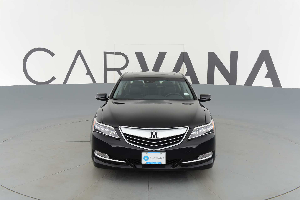

In [11]:
Image.open(PATH / TRAIN_DN / f'{CAR_ID}_01.jpg').resize((300, 200))

In [12]:
list((PATH / MASKS_DN).iterdir())[:5]

[PosixPath('data/carvana/train_masks/843763f47895_01_mask.gif'),
 PosixPath('data/carvana/train_masks/34b0c08544a5_09_mask.gif'),
 PosixPath('data/carvana/train_masks/8b4b87ad7be6_16_mask.gif'),
 PosixPath('data/carvana/train_masks/61060ada97c9_03_mask.gif'),
 PosixPath('data/carvana/train_masks/5df60cf7cab2_16_mask.gif')]

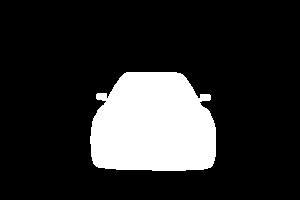

In [13]:
Image.open(PATH / MASKS_DN / f'{CAR_ID}_01_mask.gif').resize((300, 200))

Each image after the car ID has a 01, 02, etc of which I've printed out all 16 of them for one car and as you can see basically those numbers are the 16 orientations of one car. I don't think anybody in this competition actually used these orientation information. I believe they all kept the car's images just treated them separately.

In [14]:
ims = [open_image(PATH / TRAIN_DN / f'{CAR_ID}_{i+1:02d}.jpg') for i in range(16)]

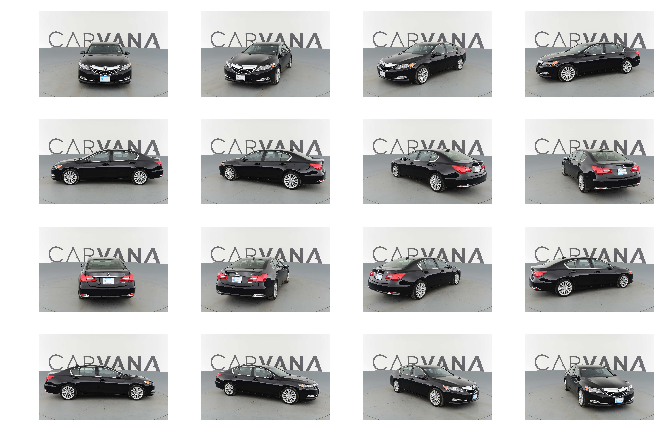

In [15]:
fig, axes = plt.subplots(4, 4, figsize=(9, 6))
for i, ax in enumerate(axes.flat):
    show_img(ims[i], ax=ax)
plt.tight_layout(pad=0.1)

### Resize and convert

These images are pretty big — over 1000 by 1000 in size and just opening the JPEGs and resizing them is slow. So I processed them all. Also OpenCV can't handle GIF files so I converted them.

The steps: converts the GIFs into PNGs so just open it up with PIL and then save it as PNG. As per usual for this kind of stuff, I do it with a ThreadPool so I can take advantage of parallel processing. And then also create a separate directory `train-128` and `train_masks-128` which contains the 128 by 128 resized versions of them.

_Tips: This is the kind of stuff that keeps you sane if you do it early in the process. So anytime you get a new dataset, seriously think about creating a smaller version to make life fast. Anytime you find yourself waiting on your computer, try and think of a way to create a smaller version._

Convert train masks to PNG images:

In [37]:
(PATH / 'train_masks_png').mkdir(exist_ok=True)

In [59]:
def convert_img(fn):
    fn = fn.name
    Image.open(PATH / 'train_masks' / fn).save(PATH / 'train_masks_png' / f'{fn[:-4]}.png')

In [60]:
files = list((PATH / 'train_masks').iterdir())
with ThreadPoolExecutor(8) as e:
    e.map(convert_img, files)

Resize train masks PNG images to 128 by 128:

In [61]:
(PATH / 'train_masks-128').mkdir(exist_ok=True)

In [62]:
def resize_mask(fn):
    Image.open(fn).resize((128, 128)).save((fn.parent.parent) / 'train_masks-128' / fn.name)

In [63]:
%%time
files = list((PATH / 'train_masks_png').iterdir())
with ThreadPoolExecutor(8) as e:
    e.map(resize_mask, files)

CPU times: user 32.3 s, sys: 608 ms, total: 32.9 s
Wall time: 8.87 s


Resize train images to 128 by 128:

In [64]:
(PATH / 'train-128').mkdir(exist_ok=True)

In [65]:
def resize_img(fn):
    Image.open(fn).resize((128, 128)).save((fn.parent.parent) / 'train-128' / fn.name)

In [66]:
%%time
files = list((PATH / 'train').iterdir())
with ThreadPoolExecutor(8) as e:
    e.map(resize_img, files)

CPU times: user 4min 2s, sys: 640 ms, total: 4min 3s
Wall time: 1min 2s


## Dataset

In [16]:
TRAIN_DN = 'train-128'
MASKS_DN = 'train_masks-128'
sz = 128
bs = 64

In [17]:
ims = [open_image(PATH / TRAIN_DN / f'{CAR_ID}_{i+1:02d}.jpg') for i in range(16)]
im_masks = [open_image(PATH / MASKS_DN / f'{CAR_ID}_{i+1:02d}_mask.png') for i in range(16)]

So here is a **cool trick**. If you use the same axis object (`ax`) to plot an image twice and the second time you use alpha which you might know means transparency in the computer vision world, then you can actually plot the mask over the top of the photo. So here is a nice way to see all the masks on top of the photos for all of the cars in one group.

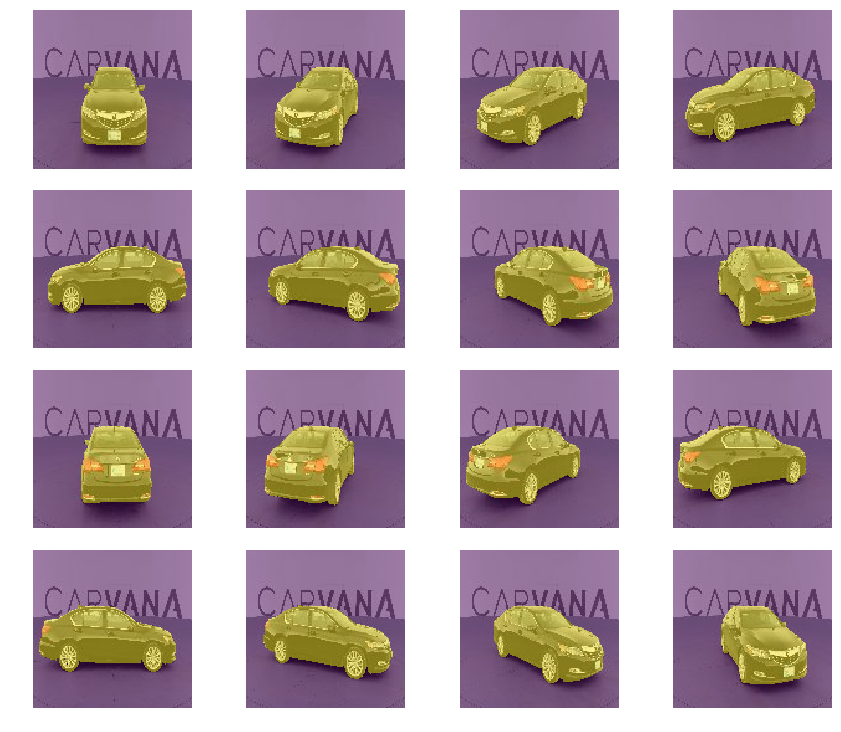

In [18]:
fig, axes = plt.subplots(4, 4, figsize=(12, 10))
for i, ax in enumerate(axes.flat):
    ax = show_img(ims[i], ax=ax)
    show_img(im_masks[i][..., 0], ax=ax, alpha=0.5)
plt.tight_layout(pad=0.1)

In [19]:
class MatchedFilesDataset(FilesDataset):
    def __init__(self, fnames, y, transform, path):
        self.y = y
        assert(len(fnames) == len(y))
        super().__init__(fnames, transform, path)
    
    def get_y(self, i): return open_image(os.path.join(self.path, self.y[i]))
    
    def get_c(self): return 0

In [20]:
# train-128/00087a6bd4dc_01.jpg -> train_masks-128/00087a6bd4dc_01_mask.png
# train-128/00087a6bd4dc_02.jpg -> train_masks-128/00087a6bd4dc_02_mask.png
# ... ... ...
# train-128/00087a6bd4dc_16.jpg -> train_masks-128/00087a6bd4dc_16_mask.png
x_names = np.array([Path(TRAIN_DN) / o for o in masks_csv['img']])
y_names = np.array([Path(MASKS_DN) / f'{o[:-4]}_mask.png' for o in masks_csv['img']])

In [21]:
len(x_names) // 16 // 5 * 16

1008

So we use a continuous set of car IDs and since each set is a set of 16, we make sure that's evenly divisible by 16. So we make sure that our validation set contains different car IDs to our training set. This is the kind of stuff which you've got to be careful of.

In [22]:
val_idxs = list(range(1008))
((val_x, trn_x), (val_y, trn_y)) = split_by_idx(val_idxs, x_names, y_names)
len(val_x), len(trn_x)

(1008, 4080)

Data augmentations

TLDR; you should use `tfm_y = TfmType.CLASS` when your target is a mask.

Here we are going to use transform type classification (`TfmType.CLASS`). It's basically the same as transform type pixel (`TfmType.PIXEL`) but if you think about it, with a pixel version if we rotate a little bit then we probably want to average the pixels in between the two, but the classification, obviously we don't. We use nearest neighbor. So there's slight difference there. Also for classification, lighting doesn't kick in, normalization doesn't kick in to the dependent variable.

In [23]:
aug_tfms = [RandomRotate(4, tfm_y=TfmType.CLASS),
            RandomFlip(tfm_y=TfmType.CLASS),
            RandomLighting(0.05, 0.05)]

They are already square images, so we don't have to do any cropping.

In [24]:
tfms = tfms_from_model(resnet34, sz, crop_type=CropType.NO, tfm_y=TfmType.CLASS, aug_tfms=aug_tfms)
datasets = ImageData.get_ds(MatchedFilesDataset, (trn_x, trn_y), (val_x, val_y), tfms, path=PATH)
md = ImageData(PATH, datasets, bs, num_workers=8, classes=None)

In [25]:
denorm = md.trn_ds.denorm
x, y = next(iter(md.aug_dl))
x = denorm(x)

So here you can see different versions of the augmented images — they are moving around a bit, and they are rotating a bit, and so forth.

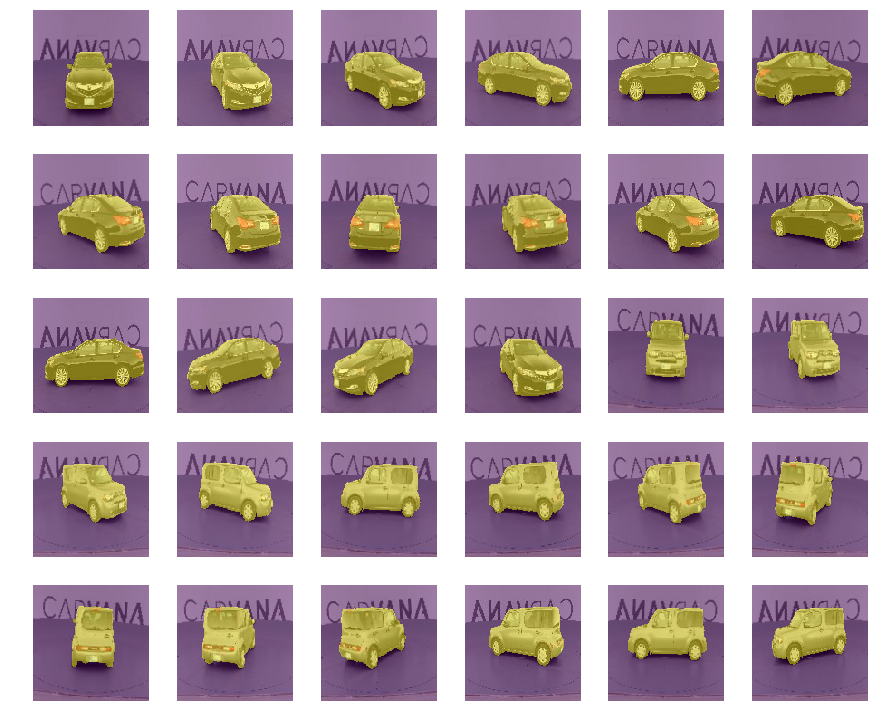

In [26]:
fig, axes = plt.subplots(5, 6, figsize=(12, 10))
for i, ax in enumerate(axes.flat):
    ax = show_img(x[i], ax=ax)
    show_img(y[i], ax=ax, alpha=0.5)
plt.tight_layout(pad=0.1)

## Model

Given that we want something that knows what cars look like, we probably want to start with a pre-trained ImageNet network. So we are going to start with ResNet34. With `ConvnetBuilder`, we can grab our ResNet34 and we can add a custom head. The custom head is going to be something that upsamples a bunch of times and we are going to do things really dumb for now which is we're just going to do a ConvTranspose2d, batch norm, ReLU.

So at the very end, we have a single filter. Now that's going to give us something which is batch size by 1 by 128 by 128. But we want something which is batch size by 128 by 128. So we have to remove that unit axis so I've got a lambda layer here.

In [27]:
class Empty(nn.Module):
    def forward(self, x): return x

In [28]:
models = ConvnetBuilder(resnet34, 0, 0, 0, custom_head=Empty())
learn = ConvLearner(md, models)
learn.summary()

OrderedDict([('Conv2d-1',
              OrderedDict([('input_shape', [-1, 3, 128, 128]),
                           ('output_shape', [-1, 64, 64, 64]),
                           ('trainable', False),
                           ('nb_params', 9408)])),
             ('BatchNorm2d-2',
              OrderedDict([('input_shape', [-1, 64, 64, 64]),
                           ('output_shape', [-1, 64, 64, 64]),
                           ('trainable', False),
                           ('nb_params', 128)])),
             ('ReLU-3',
              OrderedDict([('input_shape', [-1, 64, 64, 64]),
                           ('output_shape', [-1, 64, 64, 64]),
                           ('nb_params', 0)])),
             ('MaxPool2d-4',
              OrderedDict([('input_shape', [-1, 64, 64, 64]),
                           ('output_shape', [-1, 64, 32, 32]),
                           ('nb_params', 0)])),
             ('Conv2d-5',
              OrderedDict([('input_shape', [-1, 64, 32, 32]),
      

In [29]:
class StdUpsample(nn.Module):
    def __init__(self, nin, nout):
        super().__init__()
        self.conv = nn.ConvTranspose2d(nin, nout, 2, stride=2)
        self.bn = nn.BatchNorm2d(nout)
        
    def forward(self, x): return self.bn(F.relu(self.conv(x)))

_Note: Lambda layer is actually something that's a part of the fastai library not part of the PyTorch library._

In [30]:
flatten_channel = Lambda(lambda x: x[:, 0])

So this is our custom head.

In [31]:
simple_up = nn.Sequential(
    nn.ReLU(),
    StdUpsample(512, 256),
    StdUpsample(256, 256),
    StdUpsample(256, 256),
    StdUpsample(256, 256),
    nn.ConvTranspose2d(256, 1, 2, stride=2),
    flatten_channel
)

Next, we are going to have a ResNet-34 that goes downsample and then a really simple custom head that very quickly upsamples, and that hopefully will do something. And we are going to use accuracy with a threshold of 0.5 and print out metrics.

In [32]:
models = ConvnetBuilder(resnet34, 0, 0, 0, custom_head=simple_up)
learn = ConvLearner(md, models)
learn.opt_fn = optim.Adam
learn.crit = nn.BCEWithLogitsLoss()
learn.metrics = [accuracy_thresh(0.5)]

In [33]:
learn.summary()

OrderedDict([('Conv2d-1',
              OrderedDict([('input_shape', [-1, 3, 128, 128]),
                           ('output_shape', [-1, 64, 64, 64]),
                           ('trainable', False),
                           ('nb_params', 9408)])),
             ('BatchNorm2d-2',
              OrderedDict([('input_shape', [-1, 64, 64, 64]),
                           ('output_shape', [-1, 64, 64, 64]),
                           ('trainable', False),
                           ('nb_params', 128)])),
             ('ReLU-3',
              OrderedDict([('input_shape', [-1, 64, 64, 64]),
                           ('output_shape', [-1, 64, 64, 64]),
                           ('nb_params', 0)])),
             ('MaxPool2d-4',
              OrderedDict([('input_shape', [-1, 64, 64, 64]),
                           ('output_shape', [-1, 64, 32, 32]),
                           ('nb_params', 0)])),
             ('Conv2d-5',
              OrderedDict([('input_shape', [-1, 64, 32, 32]),
      

## Train

As usual, run LR find and train it for a while.

 88%|████████▊ | 56/64 [00:14<00:02,  3.81it/s, loss=3.29] CPU times: user 20.5 s, sys: 4.9 s, total: 25.4 s
Wall time: 15 s


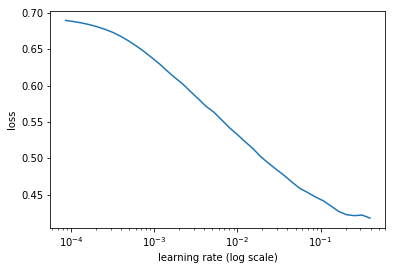

In [34]:
%time learn.lr_find()
learn.sched.plot()

In [36]:
lr = 4e-2

In [37]:
%time learn.fit(lr, 1, cycle_len=5, use_clr=(20, 5), callbacks=[notif_cb])

epoch      trn_loss   val_loss   <lambda>                  
    0      0.175499   0.164023   0.93855   
    1      0.126078   0.11622    0.952671                  
    2      0.105822   0.114652   0.954679                  
    3      0.094272   0.099023   0.953703                   
    4      0.085624   0.088139   0.959781                   
CPU times: user 2min 3s, sys: 26.8 s, total: 2min 30s
Wall time: 1min 34s


[array([0.08814]), 0.9597813439747643]

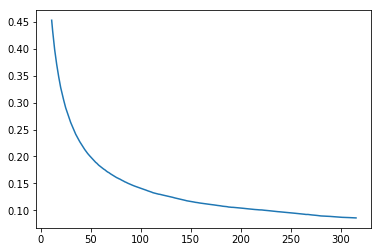

In [38]:
learn.sched.plot_loss()

**Analysis of the result**

After a few epochs, we've got 96 percent accurate. Is that good?

It depends. What's it for? Carvana wanted this because they wanted to be able to take their car image and cut them out and paste them on whatever backgrounds. To do that, you you need a really good mask. You don't want to leave the rearview mirrors behind, have one wheel missing, or include a little bit of background or something. So you would need something very good. So only having 96% of the pixels correct doesn't sound great. But we won't really know until we look at it. So let's look at it.

In [39]:
learn.save('tmp')

In [40]:
learn.load('tmp')

In [41]:
py, ay = learn.predict_with_targs()

In [42]:
ay.shape, py.shape

((1008, 128, 128), (1008, 128, 128))

The correct version that we want to cut out:

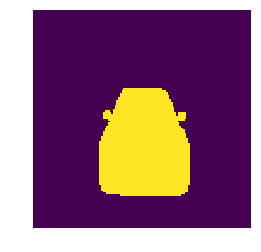

In [43]:
show_img(ay[0])

That's the 96% accurate version. So when you look at it you realize "oh yeah, getting 96% of the pixel accurate is actually easy because all the outside bit is not car, and all the inside bit is a car, and really interesting bit is the edge. So we need to do better.

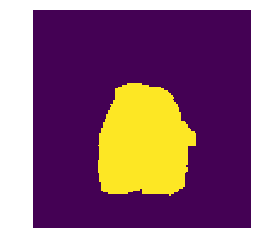

In [44]:
show_img(py[0] > 0)

Let's unfreeze because all we've done so far is train the custom head. Let's do more.

In [45]:
learn.unfreeze()

In [46]:
learn.bn_freeze(True)

In [47]:
# array of learning rates
lrs = np.array([lr / 100, lr / 10, lr]) / 4

With cuDNN benchmark enabled.

In [48]:
%time learn.fit(lrs, 1, cycle_len=20, use_clr=(20, 10), callbacks=[notif_cb])

epoch      trn_loss   val_loss   <lambda>                   
    0      0.067885   0.050644   0.978268  
    1      0.049088   0.042999   0.9821                     
    2      0.039807   0.033946   0.985709                   
    3      0.033211   0.031423   0.987082                   
    4      0.029628   0.029189   0.988278                   
    5      0.02701    0.027501   0.989043                   
    6      0.025741   0.026826   0.989046                   
    7      0.024148   0.025348   0.989573                   
    8      0.022486   0.024925   0.989342                   
    9      0.022097   0.024011   0.989791                   
    10     0.020981   0.023307   0.990627                   
    11     0.019947   0.023106   0.990409                   
    12     0.019217   0.022634   0.990954                   
    13     0.018658   0.022451   0.990642                   
    14     0.018196   0.021879   0.990888                   
    15     0.017566   0.021348   0.991257

[array([0.0207]), 0.9918439965399485]

With cuDNN benchmark disabled.

In [171]:
%time learn.fit(lrs, 1, cycle_len=20, use_clr=(20, 10), callbacks=[notif_cb])

epoch      trn_loss   val_loss   <lambda>                   
    0      0.015785   0.020673   0.99169   
    1      0.017603   0.022358   0.990212                   
    2      0.018592   0.022732   0.99128                    
    3      0.019646   0.023073   0.990465                   
    4      0.018345   0.021401   0.990871                   
    5      0.017203   0.020322   0.991719                   
    6      0.016402   0.020434   0.991706                   
    7      0.015707   0.02045    0.991949                   
    8      0.01529    0.019834   0.992149                   
    9      0.014755   0.019734   0.992234                   
    10     0.014321   0.019756   0.99238                    
    11     0.013958   0.019861   0.992505                   
    12     0.013527   0.019761   0.992431                   
    13     0.013237   0.019764   0.99273                    
    14     0.012983   0.019742   0.992547                   
    15     0.012557   0.019709   0.992447

[array([0.01964]), 0.9930412665246025]

After a bit more, we've got 99.3%. Is that good? I don't know. Let's take a look.

In [172]:
learn.save('0')

In [50]:
x, y = next(iter(md.val_dl)) # x is the car image, 64 of them in a batch
py = to_np(learn.model(V(x))) # the mask, 64 of them in a batch.

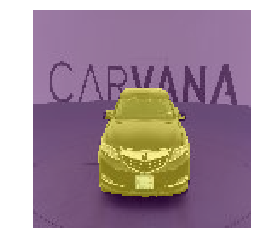

In [62]:
ax = show_img(denorm(x)[0]) # ax is one (at index 0) denormalized car image
show_img(py[0] > 0, ax=ax, alpha=0.5) # py[0] is one (at index 0) mask

Actually no. It's totally missed the rearview vision mirror on the left and missed a lot of it on the right. And it's clearly got an edge wrong on the bottom. And these things are totally going to matter when we try to cut it out, so it's still not good enough.

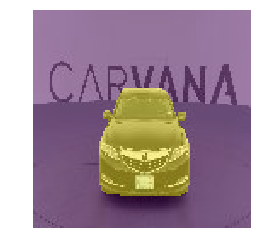

In [63]:
ax = show_img(denorm(x)[0])
show_img(y[0], ax=ax, alpha=0.5)

## 512x512

Let's try upscaling. And the nice thing is that when we upscale to 512 by 512, (make sure you decrease the batch size because you'll run out of memory), it's quite a lot more information there for it to go on so our accuracy increases to 99.4% and things keep getting better.

In [64]:
TRAIN_DN = 'train'
MASKS_DN = 'train_masks_png'
sz = 512
bs = 16

In [65]:
x_names = np.array([Path(TRAIN_DN) / o for o in masks_csv['img']])
y_names = np.array([Path(MASKS_DN) / f'{o[:-4]}_mask.png' for o in masks_csv['img']])

In [66]:
((val_x, trn_x), (val_y, trn_y)) = split_by_idx(val_idxs, x_names, y_names)
len(val_x), len(trn_x)

(1008, 4080)

In [67]:
tfms = tfms_from_model(resnet34, sz, crop_type=CropType.NO, tfm_y=TfmType.CLASS, aug_tfms=aug_tfms)
datasets = ImageData.get_ds(MatchedFilesDataset, (trn_x, trn_y), (val_x, val_y), tfms, path=PATH)
md = ImageData(PATH, datasets, bs, num_workers=8, classes=None)

In [68]:
denorm = md.trn_ds.denorm
x, y = next(iter(md.aug_dl))
x = denorm(x)

Here's the ground truth.

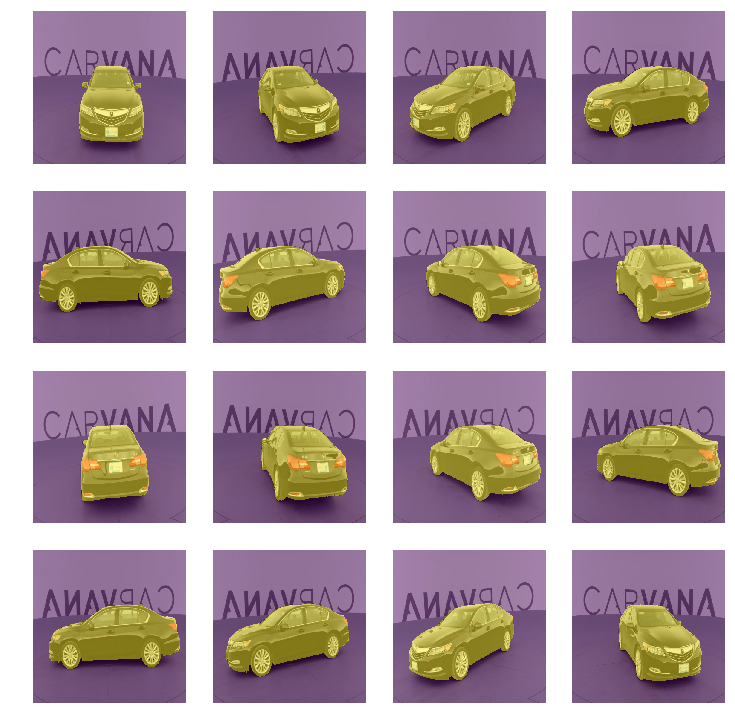

In [69]:
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax = show_img(x[i], ax=ax)
    show_img(y[i], ax=ax, alpha=0.5)
plt.tight_layout(pad=0.1)

In [70]:
simple_up = nn.Sequential(
    nn.ReLU(),
    StdUpsample(512, 256),
    StdUpsample(256, 256),
    StdUpsample(256, 256),
    StdUpsample(256, 256),
    nn.ConvTranspose2d(256, 1, 2, stride=2),
    flatten_channel
)

In [71]:
models = ConvnetBuilder(resnet34, 0, 0, 0, custom_head=simple_up)
learn = ConvLearner(md, models)
learn.opt_fn = optim.Adam
learn.crit = nn.BCEWithLogitsLoss()
learn.metrics = [accuracy_thresh(0.5)]

In [87]:
learn.load('0')

 80%|███████▉  | 203/255 [04:16<01:05,  1.26s/it, loss=0.901]

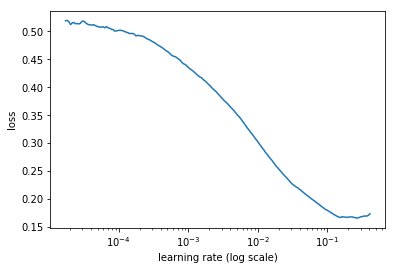

In [185]:
learn.lr_find()
learn.sched.plot()

In [73]:
lr = 4e-2

In [187]:
%time learn.fit(lr, 1, cycle_len=5, use_clr=(20, 5), callbacks=[notif_cb])

epoch      trn_loss   val_loss   <lambda>                     
    0      0.053045   0.056443   0.976122  
    1      0.034384   0.03848    0.982819                     
    2      0.029025   0.028036   0.98826                      
    3      0.025769   0.026095   0.990837                     
    4      0.023503   0.023225   0.99101                      
CPU times: user 1h 17min 27s, sys: 7min 36s, total: 1h 25min 3s
Wall time: 31min 16s


[array([0.02322]), 0.9910101739187089]

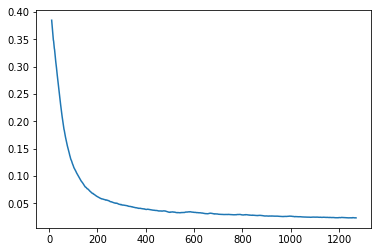

In [188]:
learn.sched.plot_loss()

In [189]:
learn.save('tmp')

In [89]:
learn.load('tmp')

In [74]:
learn.unfreeze()
learn.bn_freeze(True)

In [75]:
lrs = np.array([lr / 100, lr / 10, lr]) / 4

In [193]:
%time learn.fit(lrs, 1, cycle_len=8, use_clr=(20, 8), callbacks=ks=[notif_cb])

epoch      trn_loss   val_loss   <lambda>                     
    0      0.016866   0.012258   0.995355  
    1      0.009588   0.009799   0.995858                      
    2      0.008489   0.009014   0.996504                      
    3      0.00801    0.008541   0.996556                      
    4      0.007585   0.008287   0.996624                      
    5      0.007114   0.008004   0.996836                      
    6      0.007005   0.007713   0.996924                      
    7      0.006721   0.007581   0.996972                      
CPU times: user 2h 40min 40s, sys: 12min 6s, total: 2h 52min 46s
Wall time: 1h 27min 54s


[array([0.00758]), 0.9969720689077226]

In [194]:
learn.save('512')

In [77]:
x, y = next(iter(md.val_dl))
py = to_np(learn.model(V(x)))

The 99.7% version:

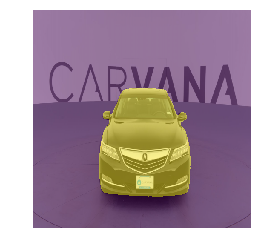

In [196]:
ax = show_img(denorm(x)[0])
show_img(py[0] > 0, ax=ax, alpha=0.5)

The correct version that we want to cut out:

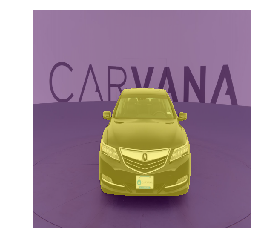

In [79]:
ax = show_img(denorm(x)[0])
show_img(y[0], ax=ax, alpha=0.5)

Things keep getting better but we've still got quite a few little black blocky bits. So let's go to 1024 by 1024.

## 1024x1024

So let's go to 1024 by 1024, batch size down to 4. This is pretty high res now, and train a bit more, 99.6, 99.8%!

In [80]:
sz = 1024
bs = 4

In [81]:
tfms = tfms_from_model(resnet34, sz, crop_type=CropType.NO, tfm_y=TfmType.CLASS, aug_tfms=aug_tfms)
datasets = ImageData.get_ds(MatchedFilesDataset, (trn_x, trn_y), (val_x, val_y), tfms, path=PATH)
md = ImageData(PATH, datasets, bs, num_workers=8, classes=None)

In [82]:
denorm = md.trn_ds.denorm
x, y = next(iter(md.aug_dl))
x = denorm(x)
y = to_np(y)

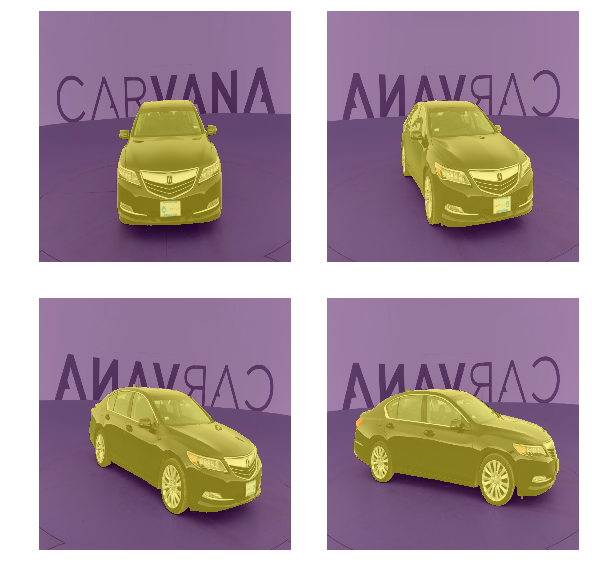

In [83]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    show_img(x[i], ax=ax)
    show_img(y[i], ax=ax, alpha=0.5)
plt.tight_layout(pad=0.1)

In [84]:
simple_up = nn.Sequential(
    nn.ReLU(),
    StdUpsample(512, 256),
    StdUpsample(256, 256),
    StdUpsample(256, 256),
    StdUpsample(256, 256),
    nn.ConvTranspose2d(256, 1, 2, stride=2),
    flatten_channel,
)

In [85]:
models = ConvnetBuilder(resnet34, 0, 0, 0, custom_head=simple_up)
learn = ConvLearner(md, models)
learn.opt_fn = optim.Adam
learn.crit = nn.BCEWithLogitsLoss()
learn.metrics = [accuracy_thresh(0.5)]

In [86]:
learn.load('512')

 72%|███████▏  | 731/1020 [12:54<05:06,  1.06s/it, loss=0.116] CPU times: user 22min 31s, sys: 2min 45s, total: 25min 16s
Wall time: 12min 55s


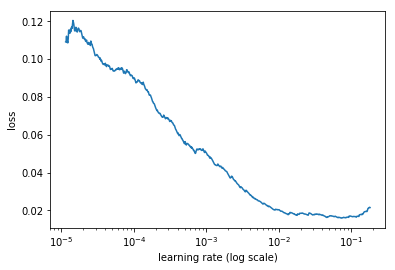

In [87]:
%%time
learn.lr_find()
learn.sched.plot()

In [90]:
lr = 4e-2

In [91]:
learn.fit(lr, 1, cycle_len=2, use_clr=(20, 4), callbacks=[notif_cb])

epoch      trn_loss   val_loss   <lambda>                       
    0      0.011072   0.009667   0.996724  
    1      0.00825    0.008175   0.997013                        


[array([0.00818]), 0.9970127060299828]

In [92]:
learn.save('tmp')

In [93]:
learn.load('tmp')

In [94]:
learn.unfreeze()
learn.bn_freeze(True)

In [95]:
lrs = np.array([lr / 100, lr / 10, lr]) / 8

Resume training from the point where we stop the training at epoch 15 previously.

In [97]:
%time learn.fit(lrs, 1, cycle_len=25, use_clr=(20, 10), callbacks=[notif_cb])

epoch      trn_loss   val_loss   <lambda>                        
    0      0.004155   0.004891   0.998142  
    1      0.005067   0.005655   0.997962                        
    2      0.005128   0.005889   0.997714                        
    3      0.00461    0.005717   0.99765                         
    4      0.004372   0.00531    0.998056                        
    5      0.004275   0.004979   0.998043                        
    6      0.004037   0.004815   0.998145                        
    7      0.003934   0.004865   0.997999                        
    8      0.004223   0.00502    0.998106                        
    9      0.00415    0.004842   0.998115                        
    10     0.003837   0.0047     0.998175                        
    11     0.004021   0.004518   0.998168                        
    12     0.003821   0.004748   0.998147                        
    13     0.003632   0.004656   0.998237                        
    14     0.003683   0.004457  

[array([0.00434]), 0.9983625430909414]

In [98]:
learn.save('1024-cyc-len-25-clr-20-10')

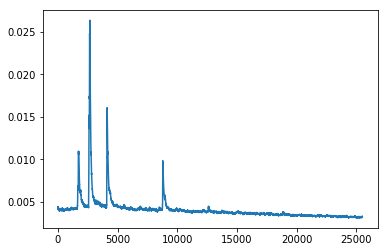

In [99]:
learn.sched.plot_loss()

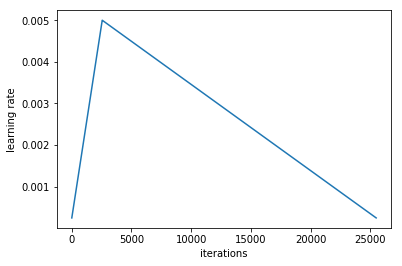

In [100]:
learn.sched.plot_lr()

In [101]:
x, y = next(iter(md.val_dl))
py = to_np(learn.model(V(x)))

Plot the mask over the top of the photo.

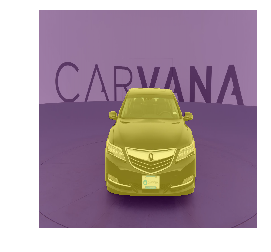

In [102]:
ax = show_img(denorm(x)[0])
show_img(py[0] > 0, ax=ax, alpha=0.5)

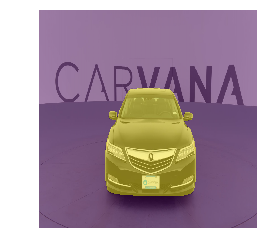

In [103]:
ax = show_img(denorm(x)[0])
show_img(y[0], ax=ax, alpha=0.5)

Plot just the mask.

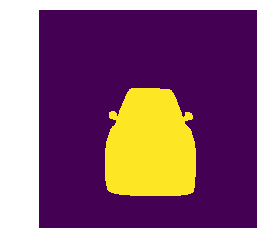

In [104]:
show_img(py[0] > 0)

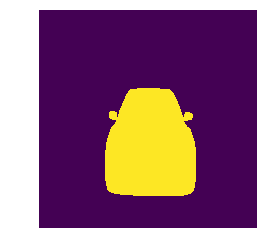

In [105]:
show_img(y[0])

In [ ]:
learn.fit(lrs, 1, cycle_len=40, use_clr=(20, 10), callbacks=[notif_cb])

epoch      trn_loss   val_loss   <lambda>                        
    0      0.005643   0.006067   0.997681  
    1      0.0054     0.006054   0.997656                        
    2      0.005204   0.005574   0.997634                        
    3      0.005528   0.00666    0.997664                        
    4      0.006686   0.007286   0.997451                        
    5      0.006337   0.006863   0.997468                        
    6      0.005324   0.006193   0.997629                        
 66%|██████▌   | 674/1020 [22:22<11:29,  1.99s/it, loss=0.00508]

_Noticed the train metrics stops in the middle of epoch 7 because I have to shutdown my computer as I am heading out. Fret not, I send the train metrics as IFTTT notifications to my mobile and here there are:_

```bash
epoch      trn_loss   val_loss   mask_acc
    0      0.005643   0.006067   0.997681
    1      0.0054     0.006054   0.997656
    2      0.005204   0.005574   0.997634
    3      0.005528   0.00666    0.997664
    4      0.006686   0.007286   0.997451
    5      0.006337   0.006863   0.997468
    6      0.005324   0.006193   0.997629
    7      0.005142   0.005845   0.997886
    8      0.005111   0.005904   0.997774
    9      0.005092   0.005472   0.997967
    10     0.004898   0.005497   0.997801
    11     0.010694   0.007598   0.997152
    12     0.004787   0.005513   0.997856
    13     0.004599   0.005142   0.997935
    14     0.004655   0.005915   0.997716
    15     0.004294   0.005211   0.998055
[0.0052112686, 0.99805523208291195]
```

It took me ~37 minutes (2195.4s) to train 1 epoch on a K80 GPU, roughly 1.99s/iteration. The GPU memory usage peak at ~10 GB. The full training should take me like 25 hours. So it's kind of slow. I stop training after epoch 15 and that took like 10 hours.

In [213]:
learn.save('1024-cyc-len-40-clr-20-10-epoch-15')

In [96]:
learn.load('1024-cyc-len-40-clr-20-10-epoch-15')

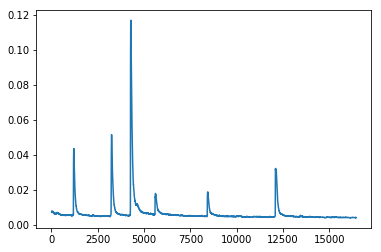

In [218]:
learn.sched.plot_loss()

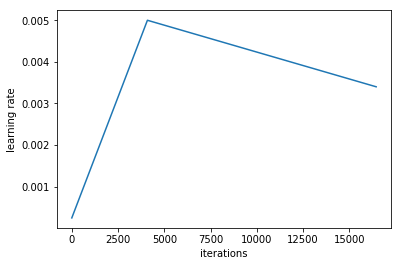

In [219]:
learn.sched.plot_lr()

In [214]:
# Boom! Out-Of-Memory.

# x, y = next(iter(md.val_dl))
# py = to_np(learn.model(V(x)))

RuntimeError: cuda runtime error (2) : out of memory at /opt/conda/conda-bld/pytorch_1518244421288/work/torch/lib/THC/generic/THCStorage.cu:58

The issue here is, GPU memory is not being releases after training is over. To [resolve this](http://forums.fast.ai/t/gpu-memory-not-being-freed-after-training-is-over/10265/4?u=cedric), follow these steps:

1. Delete some variables
2. Use `torch.cuda.empty_cache()`

It works! I was able to free some memory. The memory comsuption drop from 11.4 GB to 3.8 GB.

In [110]:
del learn

In [113]:
torch.cuda.empty_cache()

Create our `learner` object again:

In [227]:
# Lines copied from previous cell
learn = ConvLearner(md, models)
learn.opt_fn = optim.Adam
learn.crit = nn.BCEWithLogitsLoss()
learn.metrics = [accuracy_thresh(0.5)]

In [228]:
# Load model weights
learn.load('1024-cyc-len-40-clr-20-10-epoch-15')

In [125]:
# Resume by re-running that cell that gave us error
x, y = next(iter(md.val_dl))
preds = learn.model(V(x))
py = to_np(preds)

In [126]:
# DEBUG
type(x), type(y), type(V(x)), type(preds), type(py), x.shape, y.shape, V(x).shape, preds.shape, py.shape

(torch.cuda.FloatTensor,
 torch.cuda.FloatTensor,
 torch.autograd.variable.Variable,
 torch.autograd.variable.Variable,
 numpy.ndarray,
 torch.Size([4, 3, 1024, 1024]),
 torch.Size([4, 1024, 1024]),
 torch.Size([4, 3, 1024, 1024]),
 torch.Size([4, 1024, 1024]),
 (4, 1024, 1024))

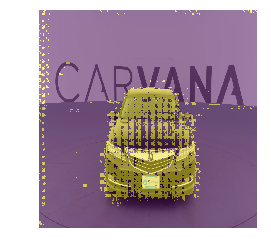

In [127]:
ax = show_img(denorm(x)[0])
# show_img(py[0][0]>0, ax=ax, alpha=0.5) # this line give an error. fixed with the next line
show_img(py[0] > 0, ax=ax, alpha=0.5)

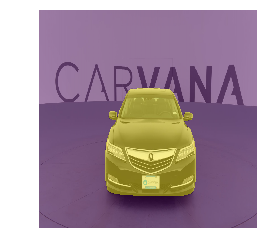

In [130]:
ax = show_img(denorm(x)[0])
# show_img(y[0,...,-1], ax=ax, alpha=0.5) # this line give error "Invalid dimensions for image data". fix in the next line.
show_img(y[0], ax=ax, alpha=0.5)

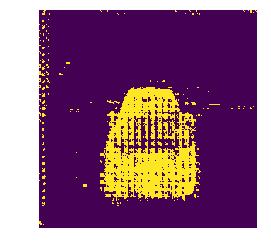

In [132]:
# show_img(py[0][0] > 0) # this line give error "Invalid dimensions for image data". fixed in the next line.
show_img(py[0] > 0)

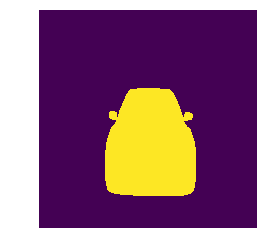

In [133]:
# show_img(y[0, ..., -1]) # this line give error. fixed in the next line.
show_img(y[0])

Now if we look at the masks, they are actually looking not bad. That's looking pretty good. So can we do better? And the answer is yes, we can.